# Stable Diffusion v1.4

Simple, portable Colab implementation of Stable Diffusion version 1.4.

In [ ]:
#@title One-Click Setup
!rm -r /content/sample_data

!pip install diffusers==0.11.1 transformers==4.25.1 scipy==1.9.3 ftfy==6.1.1
!pip install "ipywidgets>=7,<8"

!mkdir /content/output/

# download validation set - designed for Google Colab
%cd /content/
for i in range(173):
  i = i + 1
  url = f"https://github.com/rmyj/txt2img/raw/main/assets/sd-v1-4.zip.{i:03}"
  !wget $url
# concatenate all part files to one zip
!cat /content/sd-v1-4.zip* > /content/sd-v1-4.zip
!rm /content/sd-v1-4.zip.*
# repair combination
!zip -FF /content/sd-v1-4.zip --out /content/sd-v1-4-full.zip
!rm /content/sd-v1-4.zip
# unzip combination
!unzip /content/sd-v1-4-full.zip
!rm /content/sd-v1-4-full.zip

from PIL import Image
from diffusers import StableDiffusionPipeline
import random
import uuid
import torch

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

# set variables for inference
model_id = "/content/sd-v1-4/"
pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe = pipe.to("cuda")

# to disable the safety checker
pipe.safety_checker = lambda images, clip_input: (images, False)

## Image Synthesis

new zealand-10459785612894902981


  0%|          | 0/49 [00:00<?, ?it/s]

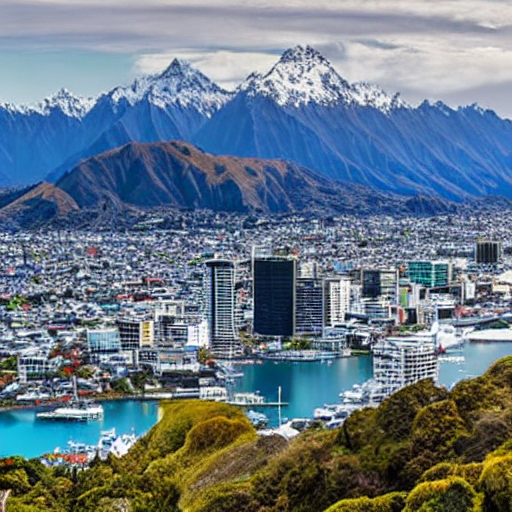

In [24]:
prompt = "new zealand"

height = 512
width = 512

seed = uuid.uuid4().int & (1<<64)-1
g_cuda = torch.Generator("cuda").manual_seed(seed)

print(f"{prompt}-{seed}")
image = pipe(prompt, height=height, width=width, num_inference_steps=49, guidance_scale=7.5, generator=g_cuda).images[0]
image.save(f"/content/output/{seed}.png")
image

In [ ]:
#@title Save output file to Google Drive
#@markdown This code block requests permission for this notebook to access your Google Drive, then zips the output folder, and moves it to your Google Drive home directory for later download. This method is by far the fastest way to download files from Google Colab, as the direct browser download takes a very long time.
#@markdown output.zip will be saved in `/content/drive/MyDrive/txt2img/output.zip`

from google.colab import drive
drive.mount('/content/drive')

!mkdir /content/drive/MyDrive/txt2img

!zip -r /content/output.zip /content/output/
!rm -r /content/output/*

!rm /content/drive/MyDrive/txt2img/output.zip

!mv /content/output.zip /content/drive/MyDrive/txt2img/output.zip

## Download

To download `output.zip`, simply navigate to your Google Drive, txt2img directory, right-click and download the archive.

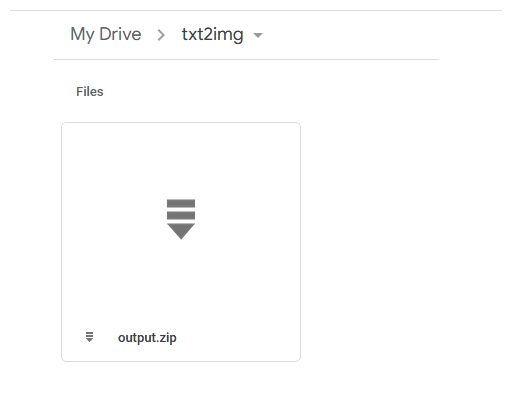